In [ ]:
import pandas as pd

us_accidents = pd.read_csv(us_accidents_path)
us_accidents

/kaggle/input/us-accidents/US_Accidents_March23.csv


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Time of Day vs Accident Frequency per Day of Week')

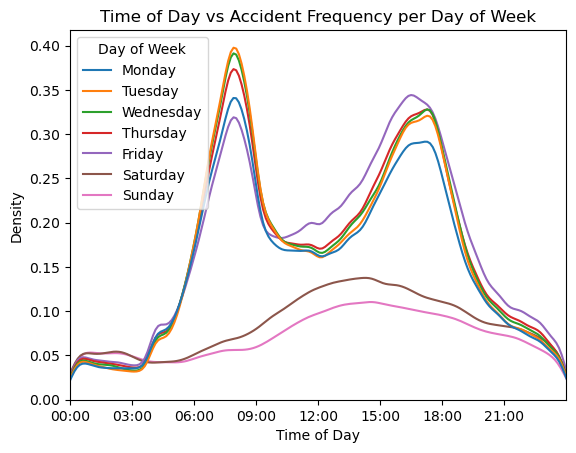

In [ ]:
import seaborn as sns
from matplotlib import dates
import calendar

#Convert to datetime format
us_accidents["Start_Time"] = pd.to_datetime(us_accidents["Start_Time"])

#Days of the week as categories
cat_type = pd.CategoricalDtype(list(calendar.day_name), ordered=True)

#Create the day of the week feature
us_accidents['Day of Week'] = pd.Categorical.from_codes(us_accidents["Start_Time"].dt.day_of_week, dtype=cat_type)

#Make the date for every time 2000-01-01. This is so that the density curve will be for a single arbitrary day to just showcase the times
us_accidents['Time of Day'] = pd.to_datetime('2000-01-01 ' + us_accidents['Start_Time'].dt.time.astype(str))

#X axis is time of day, a line for each day of the week
timeOfDayAccidentDensity = sns.kdeplot(data=us_accidents, x='Time of Day', hue='Day of Week')

#Times should be between 00:00:00 and 23:59:59
timeOfDayAccidentDensity.set_xlim([pd.to_datetime('2000-01-01 00:00:00'), pd.to_datetime('2000-01-01 23:59:59')])

#Times should be in HH:MM format, no seconds
timeOfDayAccidentDensity.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

timeOfDayAccidentDensity.set_title("Time of Day vs Accident Frequency per Day of Week")

In [ ]:
import datetime

#Check for invalid dates
num_invalid_dates = 0
invalid_dates = []

for date in us_accidents['Start_Time']:

    #Date is before February 8th, 2016
    if (date <= datetime.datetime(2016,2,7)):
        num_invalid_dates += 1
        invalid_dates.append(date)

    #Date is after March 31st, 2023
    elif (date >= datetime.datetime(2023,4,1)):
        num_invalid_dates += 1
        invalid_dates.append(date)

    #Second is not 0-59
    elif (date.second > 59 or date.second < 0):
        num_invalid_dates += 1
        invalid_dates.append(date)

    #Minute is not 0-59
    elif (date.minute > 59 or date.minute < 0):
        num_invalid_dates += 1
        invalid_dates.append(date)

    #Hour is not 0-23
    elif (date.hour > 23 or date.hour < 0):
        num_invalid_dates += 1
        invalid_dates.append(date)

print('Number of invalid Start_Time\'s: ', num_invalid_dates)
print('List of invalid Start_Time\'s: ', invalid_dates, '\n')


#Check for invalid latitudes
num_invalid_lats = 0
invalid_lats = []
for lat in us_accidents['Start_Lat']:
    if (lat > 90 or lat < -90):
        num_invalid_lats += 1
        invalid_lats.append(lat)

print('Number of invalid Start_Lat\'s: ', num_invalid_lats)
print('List of invalid Start_Lat\'s: ', invalid_lats , '\n')


#Check for invalid longitudes
num_invalid_lngs = 0
invalid_lngs = []
for lng in us_accidents['Start_Lng']:
    if (lng > 180 or lng < -180):
        num_invalid_lngs += 1
        invalid_lngs.append(lng)

print('Number of invalid Start_Lng\'s: ', num_invalid_lngs)
print('List of invalid Start_Lng\'s: ', invalid_lngs, '\n')


#Check for invalid severities
num_invalid_sevs = 0
invalid_sevs = []
for sev in us_accidents['Severity']:
    if (sev != 1 and sev != 2 and sev != 3 and sev != 4):
        num_invalid_sevs += 1
        invalid_sevs.append(sev)

print('Number of invalid Severity\'s: ', num_invalid_sevs)
print('List of invalid Severity\'s: ', invalid_sevs, '\n')

Number of invalid Start_Time's:  7
List of invalid Start_Time's:  [Timestamp('2016-01-14 20:18:33'), Timestamp('2016-01-14 20:18:33'), Timestamp('2016-01-14 20:18:33'), Timestamp('2016-01-14 20:18:33'), Timestamp('2016-01-14 20:18:33'), Timestamp('2016-01-14 20:18:33'), Timestamp('2016-01-14 20:18:33')] 

Number of invalid Start_Lat's:  0
List of invalid Start_Lat's:  [] 

Number of invalid Start_Lng's:  0
List of invalid Start_Lng's:  [] 

Number of invalid Severity's:  0
List of invalid Severity's:  [] 



File size in bytes:  3058183727
File size in gigabytes:  3.058183727
Granularity:  (7728394, 48)
Number of records in US_Accidents_March23.csv: 7728394
Number of unique ID's in inspections.csv: 7728394
ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibi

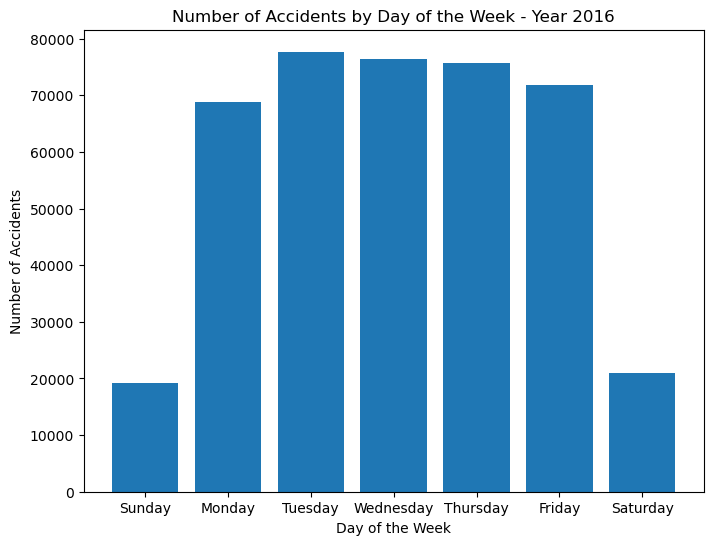

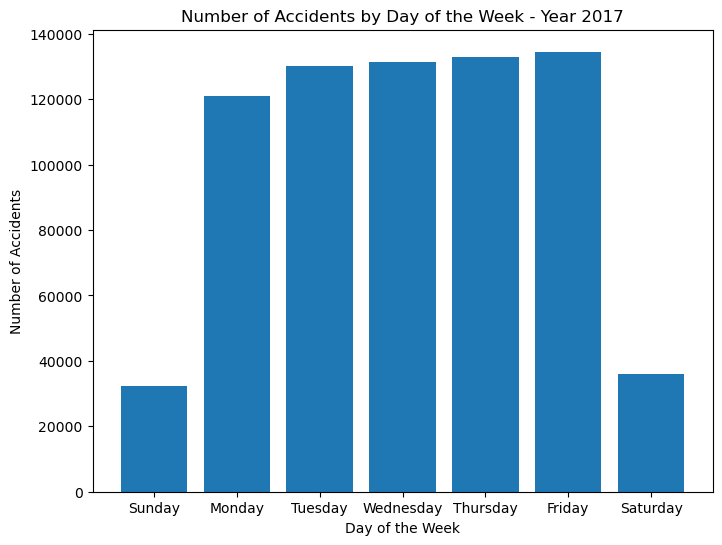

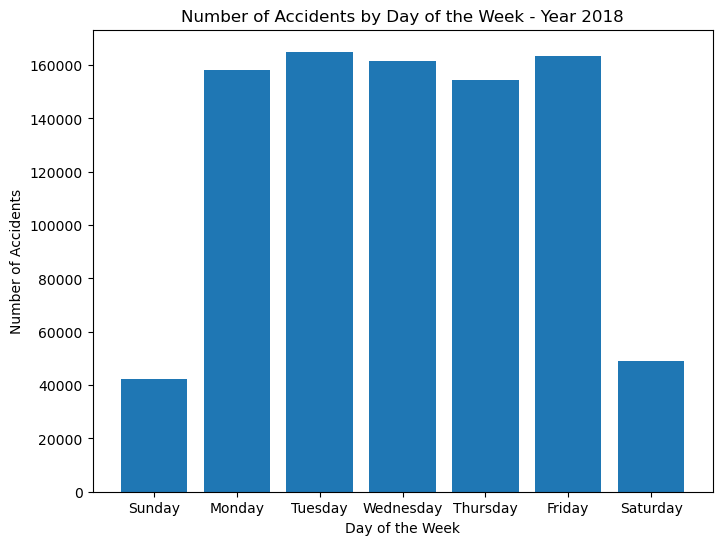

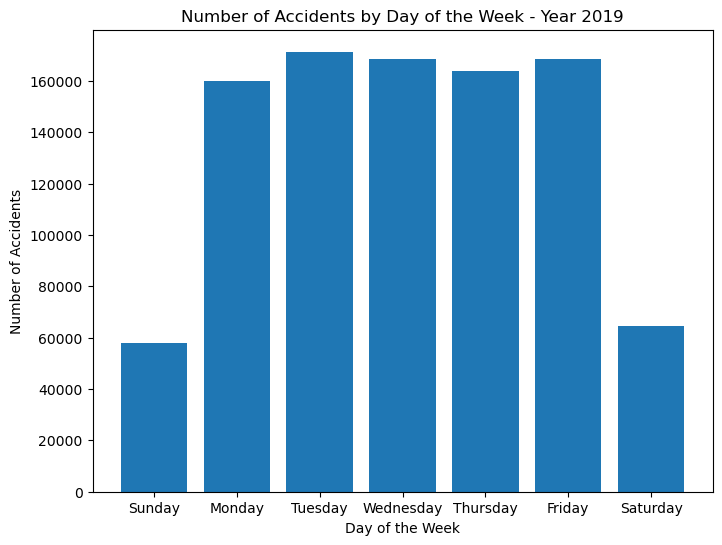

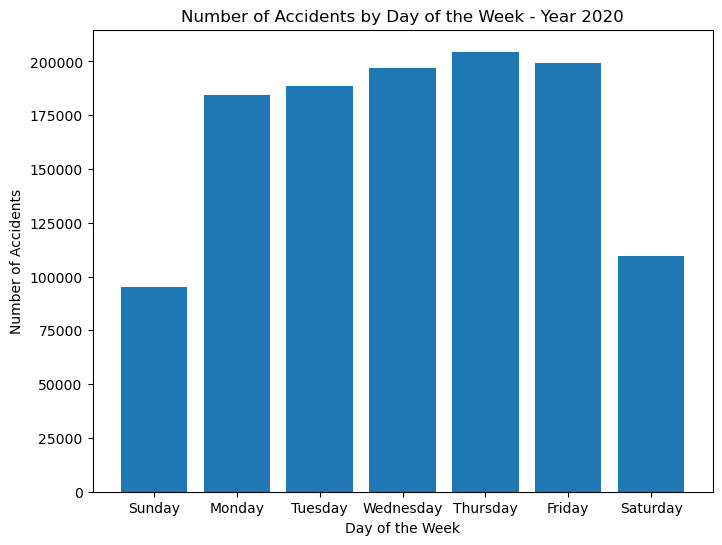

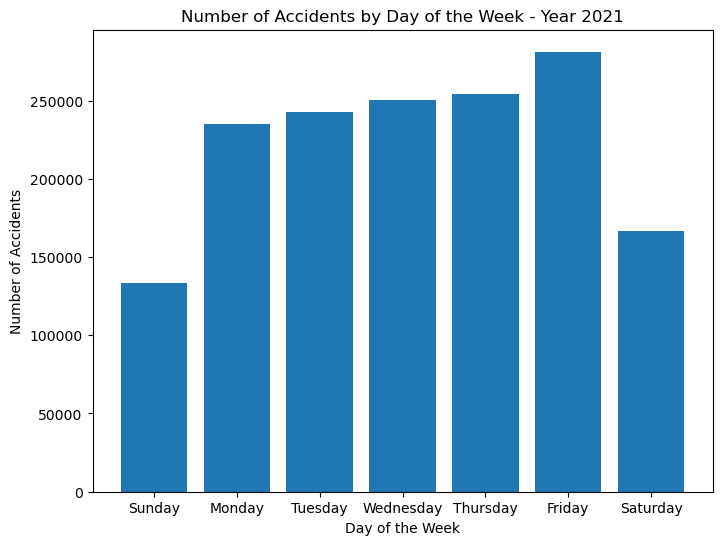

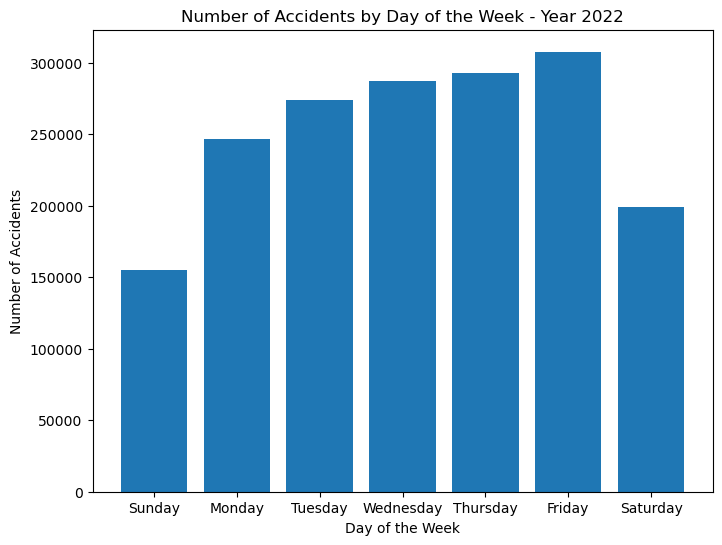

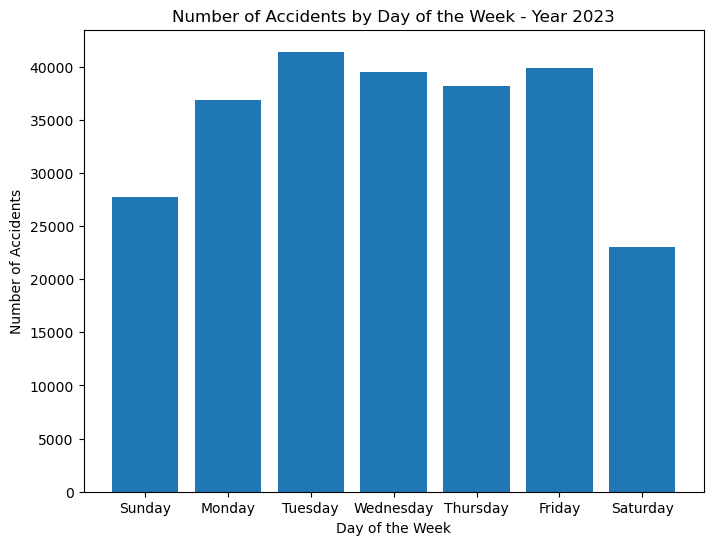

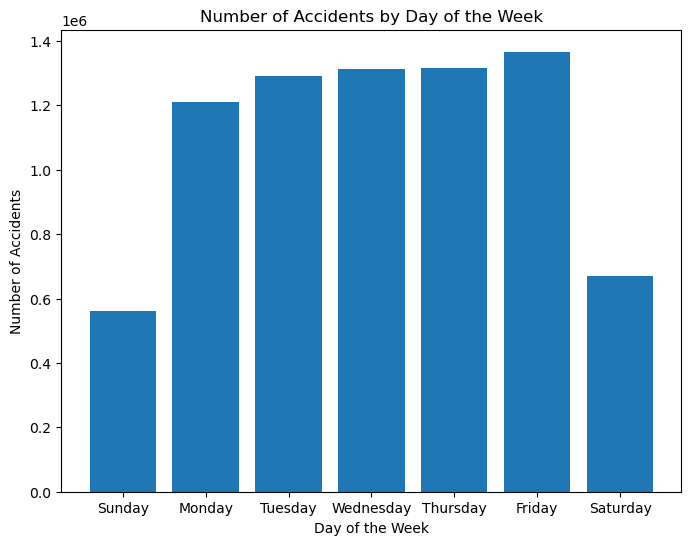

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from scipy.sparse import hstack
#import charset_normalizer
#!pip install chardet
#import chardet



################################# Sub-steps 1, 2, and 3 of Step 3  ########################

# Determining the file size
size_bytes = os.path.getsize(us_accidents_path)

size_gigabytes = size_bytes / (1000000000)

print("File size in bytes: ", size_bytes)
print("File size in gigabytes: ", size_gigabytes)


# Finding the granularity of the file
print("Granularity: ", us_accidents.shape)
print("Number of records in US_Accidents_March23.csv:", len(us_accidents))
print("Number of unique ID's in inspections.csv:", len(us_accidents['ID'].unique()))



################################## Checking the Quality of data  ########################


# count of missing values in each column
missing_values_count = us_accidents.isnull().sum()
print(missing_values_count)

# # count of NaN values in Start_Time, Start_Lat, Start_Lng, and Severity
nan_values_count_Start_Time = us_accidents['Start_Time'].isna().sum()
print("NaN values count for Start_Time:", nan_values_count_Start_Time)

nan_values_count_Start_Lat = us_accidents['Start_Lat'].isna().sum()
print("NaN values count for Start_Lat:", nan_values_count_Start_Lat)

nan_values_count_Start_Lng = us_accidents['Start_Lng'].isna().sum()
print("NaN values count for Start_Lng:", nan_values_count_Start_Lng)

nan_values_count_severity = us_accidents['Severity'].isna().sum()
print("NaN values count for severity:", nan_values_count_severity)

nan_values_count_city = us_accidents['City'].isna().sum()
print("NaN values count for City:", nan_values_count_city)




################################## Shows the accident for each day of the week for each year. Output = 8 graphs  ########################

# Changing start_time to datetime to get year
us_accidents["Start_Time"] = pd.to_datetime(us_accidents["Start_Time"])

# getting year from the new datetime object
us_accidents['Year'] = us_accidents['Start_Time'].dt.year

# Grouping by day of the week and year, and then count the number of total accidents
grouped_data = us_accidents.groupby(['Year', us_accidents['Start_Time'].dt.day_name()])['ID'].count().unstack()

# creating list for each day of the week for proper graph day ordering
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Create separate bar graph for ea. year
for year in grouped_data.index:
    #from the grouped data take the ye ar and displays the graph by day
    data_for_year = grouped_data.loc[year].reindex(days_order)

    #creating ea. plot that is 8x6 inches
    plt.figure(figsize=(8, 6))

    # Access index of the data_for_year DataFrame.
    # Data_for_year.index accesses the values for day of the week accident data
    # Data_for_year.values accesses the values for accidents for ea day of the week.
    plt.bar(data_for_year.index, data_for_year.values)
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Accidents')
    plt.title(f'Number of Accidents by Day of the Week - Year {year}')
    plt.show()




# ################################## Sum of all accidents from 2016 - 2023 for each day of the week. Output = 1 graph ########################


# getting each day of the week from the datetime
us_accidents['day_of_week'] = us_accidents['Start_Time'].dt.day_name()

# Grouping by day of the week and year, and then count the number of total accidents
accidents_by_day = us_accidents['day_of_week'].value_counts()

# creating list for each day of the week for proper graph day ordering
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
accidents_by_day = accidents_by_day.reindex(days_order)

# Create a bar graph
# Creating ea. plot that is 8x6 inches
plt.figure(figsize=(8, 6))

# Data_for_year.index accesses the values for day of the week accident data
# Data_for_year.values accesses the values for accidents for ea day of the week.
plt.bar(accidents_by_day.index, accidents_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week')
plt.show()